# Random Forest Model - EDP

### Author - Shaurya Singh Srinet and Charvi Jain

### Importing necessary libraries

In [11]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from collections import Counter

### Loading and Preprocessing Data for Classification

In [2]:
# Set the data directory
base_directory = r"C:\Users\Charvi Jain\Downloads\dataset"
# Load and preprocess images, and label them
image_data = []
labels = []
# Define class names
class_names = ["glaucoma", "cataract", "normal", "diabetic_retinopathy"]
for class_name in class_names:
    class_directory = os.path.join(base_directory, class_name)
    for file in os.listdir(class_directory):
        if file.endswith('.jpg'):
            image_path = os.path.join(class_directory, file)
            
            # Label is the index of the class name in class_names
            label = class_names.index(class_name)
            
            # Preprocess the image (e.g., resize, normalize, convert to grayscale, etc.)
            image = cv2.imread(image_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            image = cv2.resize(image, (128, 128))  # Adjust the size as needed
            image = image / 255.0  # Normalize pixel values

            image_data.append(image)
            labels.append(label)

### Dataset Visualization

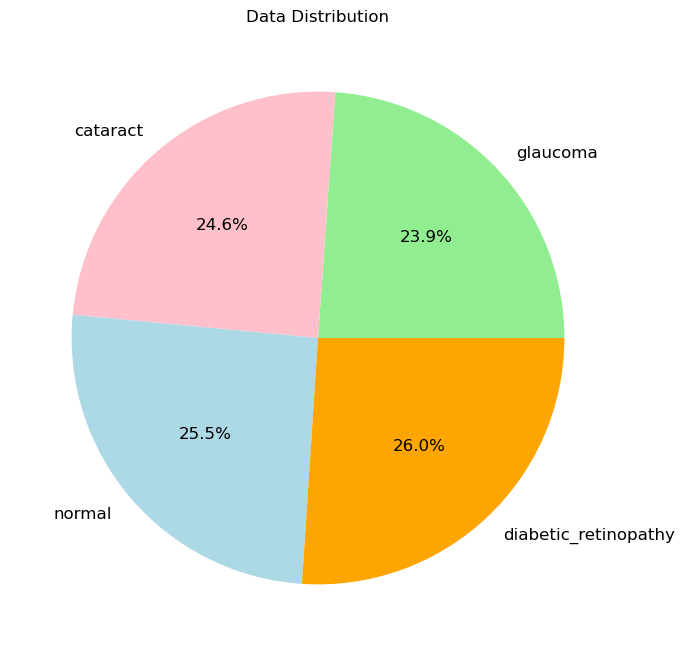

In [3]:
import matplotlib.pyplot as plt

count_for_class_0 = 1007  
count_for_class_1 = 1038 
count_for_class_2 = 1074 
count_for_class_3 = 1098  

# Create a list with the counts
class_counts = [count_for_class_0, count_for_class_1, count_for_class_2, count_for_class_3]

# Define colors for the pie chart
colors = ['lightgreen', 'pink', 'lightblue', 'orange']  # Use 'lightblue' and 'lightgreen'

# Specify text properties
text_props = {'color': 'black', 'fontsize': 12}  # Change text color to black

# Plot the data distribution as a pie chart with light blue background
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_names, autopct='%1.1f%%', colors=colors, textprops=text_props)
plt.title('Data Distribution')
plt.gca().set_facecolor('lightblue')  # Set light blue background
plt.show()

### Spliiting the data and flattening the images

In [4]:
# Split the data into training and testing sets
X = np.array(image_data)
y = np.array(labels)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
# Flatten the image data
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)


### Creating and training Random Forest classifier

In [6]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [7]:
# Make predictions on the testing data
y_pred = clf.predict(X_test)

### Evaluating the model

In [8]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7071917808219178


In [9]:
unique_classes_y_test = np.unique(y_test)
unique_classes_y_pred = np.unique(y_pred)

print("Unique classes in y_test:", unique_classes_y_test)
print("Unique classes in y_pred:", unique_classes_y_pred)


Unique classes in y_test: [0 1 2]
Unique classes in y_pred: [0 1 2]


### Generating classification report

In [10]:
from sklearn.metrics import classification_report

# Generate a classification report with the 'labels' parameter
report = classification_report(y_test, y_pred, labels=np.unique(y_test), target_names=class_names)

# Print the classification report
print(report)

                      precision    recall  f1-score   support

            glaucoma       0.75      0.54      0.63       196
            cataract       0.68      0.63      0.65       172
              normal       0.70      0.92      0.80       216

            accuracy                           0.71       584
           macro avg       0.71      0.70      0.69       584
        weighted avg       0.71      0.71      0.70       584



C:\Users\Charvi Jain\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:2561: UserWarning: labels size, 3, does not match size of target_names, 4
  warnings.warn(
